In [1]:
!pip install astroquery astropy pandas matplotlib numpy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia

In [3]:
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
query = """
SELECT TOP 2000
source_id, ra, dec, parallax, pmra, pmdec,
phot_g_mean_mag, bp_rp
FROM gaiadr3.gaia_source
WHERE parallax > 5
AND phot_g_mean_mag < 15
AND bp_rp IS NOT NULL
"""

In [5]:
job=Gaia.launch_job(query)
data=job.get_results()
df=data.to_pandas()

In [6]:
df['distance_pc']=1000/df['parallax']
df['abs_mag']=df['phot_g_mean_mag']-5*np.log10(df['distance_pc']/10)


hr diagram

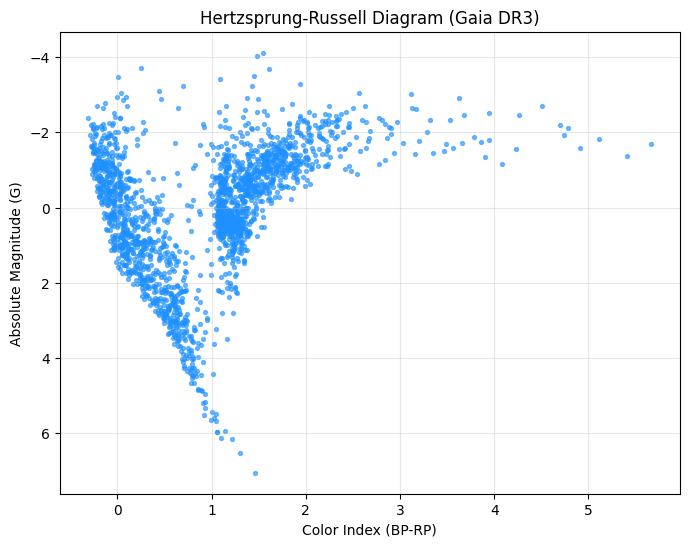

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['bp_rp'], df['abs_mag'], s=8, color='dodgerblue', alpha=0.6)
plt.gca().invert_yaxis()
plt.title("Hertzsprung-Russell Diagram (Gaia DR3)")
plt.xlabel("Color Index (BP-RP)")
plt.ylabel("Absolute Magnitude (G)")
plt.grid(True, alpha=0.3)
plt.show()

motion vector

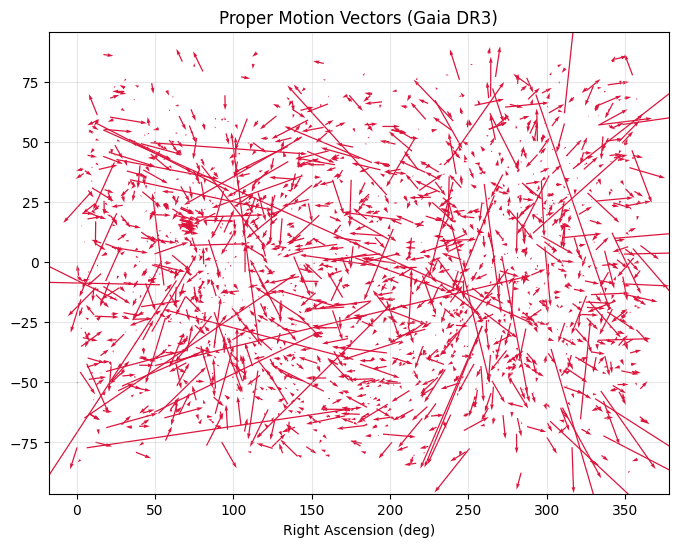

In [11]:
plt.figure(figsize=(8,6))
plt.quiver(df['ra'], df['dec'], df['pmra'], df['pmdec'], scale=5000, color='crimson', width=0.002)
plt.title("Proper Motion Vectors (Gaia DR3)")
plt.xlabel("Right Ascension (deg)")
plt.grid(True, alpha=0.3)
plt.show()

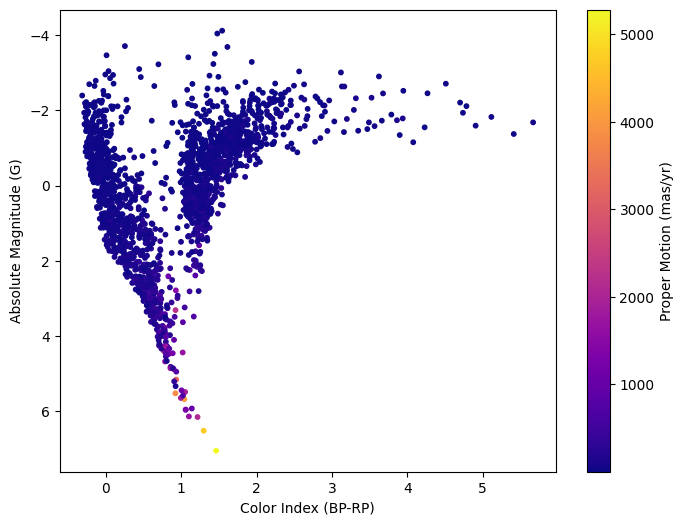

In [13]:
df['motion_speed']=np.sqrt(df['pmra']**2+df['pmdec']**2)
plt.figure(figsize=(8,6))
plt.scatter(df['bp_rp'], df['abs_mag'], c=df['motion_speed'], cmap='plasma',s=10)
plt.gca().invert_yaxis()
plt.xlabel("Color Index (BP-RP)")
plt.ylabel("Absolute Magnitude (G)")
plt.colorbar(label="Proper Motion (mas/yr)")
plt.show()